In [1]:
import numpy as np
import import_ipynb
from dumbAgent import DumbAgent
from randomAgent import RandomAgent
from environment import TicTacToe3D
import pygame, sys

importing Jupyter notebook from dumbAgent.ipynb
importing Jupyter notebook from environment.ipynb
pygame 2.5.2 (SDL 2.28.2, Python 3.8.19)
Hello from the pygame community. https://www.pygame.org/contribute.html
importing Jupyter notebook from randomAgent.ipynb


In [2]:
# dummy_board = np.zeros((4, 4, 4), dtype=int)
# # floor, row, col
# dummy_board[0, 0, 0] = 1
# dummy_board[0, 1, 1] = 1
# dummy_board[0, 2, 2] = 1

# agent = DumbAgent()
# x = agent.findBestMove(dummy_board, 1)
# print(x)

In [3]:
def main(MODE, WAIT, LOG, agent1, agent2, env, player):
	whowin = 0
	while True:
		if MODE == 1:
			pass
		elif MODE == 2:
			# player vs bot
			command = input()

			if command == 'q':
				pygame.quit()
				break
			else:
				# For Player
				x, y = [int(a) for a in command.split(" ")]
				if not env.move(x, y, player):
					print('Invalid move')
					continue
				print(f"PLAYER: {x}, {y}")
				env.draw_figures()
				player = -player

				if (result := env.check()):
					print('-OX'[result], 'wins!')
					break

				# For BOT2
				botX, botyY = agent2.findBestMove(env.board, player)
				if LOG:
					print(f"BOT: {botX}, {botyY}")
				env.move(botX, botyY, player)
				env.draw_figures()
				player = -player
				
				if (result := env.check()):
					print('-OX'[result], 'wins!')
					break
		elif MODE == 3:
			# For BOT1
			mBot = agent1.findBestMove(env.board, player)

			if mBot is None:
				print("No moves left")
				if not WAIT:
					pygame.quit()
				whowin = 0
				break

			if LOG:
				print(f"BOT1: {mBot[0]}, {mBot[1]}")
			env.move(mBot[0], mBot[1], player)
			env.draw_figures()
			player = -player

			if (result := env.check()):
				print('-OX'[result], 'wins!')
				if not WAIT:
					pygame.quit()
				whowin = 1
				break

			# For BOT2
			mBot = agent2.findBestMove(env.board, player)

			if mBot is None:
				print("No moves left")
				if not WAIT:
					pygame.quit()
				whowin = 0
				break

			if LOG:
				print(f"BOT2: {mBot[0]}, {mBot[1]}")
			env.move(mBot[0], mBot[1], player)
			env.draw_figures()
			player = -player

			if (result := env.check()):
				print('-OX'[result], 'wins!')
				if not WAIT:
					pygame.quit()
				whowin = -1
				break
	
	return whowin


In [15]:
agent = DumbAgent()
agent1 = DumbAgent(depth=3)
# agent2 = DumbAgent(depth=2)
agent2 = RandomAgent()

# env = TicTacToe3D(headless=False)
# env.draw_lines()

player = 1

MODE = 3
WAIT = False
LOG = False
# 1 for player vs player
# 2 for player vs bot
# 3 for bot vs bot

rounds = 100
first_play_first_win = 0
first_play_second_win = 0
first_play_draw = 0
second_play_first_win  = 0
second_play_second_win  = 0
second_play_draw = 0

for_plot = []
for_plot_agent1_first = []
for_plot_agent2_first = []

for i in range(rounds):
  env = TicTacToe3D(headless=False)
  env.draw_lines()

  if i < rounds // 2:
    first_agent = agent1
    second_agent = agent2
  else:
    first_agent = agent2
    second_agent = agent1

  game_result = main(MODE=MODE, WAIT=WAIT, LOG=LOG, agent1=first_agent, agent2=second_agent, env=env, player=player)

  if i < rounds // 2:
    if (game_result == 1):
      first_play_first_win += 1
    elif (game_result == -1):
      first_play_second_win += 1
    else:
      first_play_draw += 1
    for_plot_agent1_first.append([first_play_first_win, first_play_second_win, first_play_draw])
  else:
    if (game_result == 1):
      second_play_first_win += 1
    elif (game_result == -1):
      second_play_second_win += 1
    else:
      second_play_draw += 1
    for_plot_agent2_first.append([second_play_first_win, second_play_second_win, second_play_draw])

  for_plot.append([first_play_first_win + second_play_first_win, first_play_second_win + second_play_second_win, first_play_draw + second_play_draw])

  if i == (rounds // 2) - 1:
    print(f"First {rounds // 2} round, First win: {first_play_first_win}, Second win: {first_play_second_win}, Draw: {first_play_draw}")
  if i == rounds - 1:
    print(f"Last {rounds // 2} round, First win: {second_play_first_win}, Second win: {second_play_second_win}, Draw: {second_play_draw}")

Player A wins!
Player A wins!
Player A wins!
Player A wins!
Player A wins!
Player A wins!
Player A wins!
Player A wins!
Player A wins!
Player A wins!
Player A wins!
Player A wins!
Player A wins!
Player A wins!


In [13]:
print(f"In {rounds} round")
print(f"First player win: {first_play_first_win + second_play_first_win}, Second player win: {first_play_second_win + second_play_second_win}")
print(f"Agent A win: {first_play_first_win + second_play_second_win}, Agent B win: {first_play_second_win + second_play_first_win}")
print(f"Draw: {first_play_draw + second_play_draw}")

In 100 round
First player win: 100, Second player win: 0
Agent A win: 50, Agent B win: 50
Draw: 0


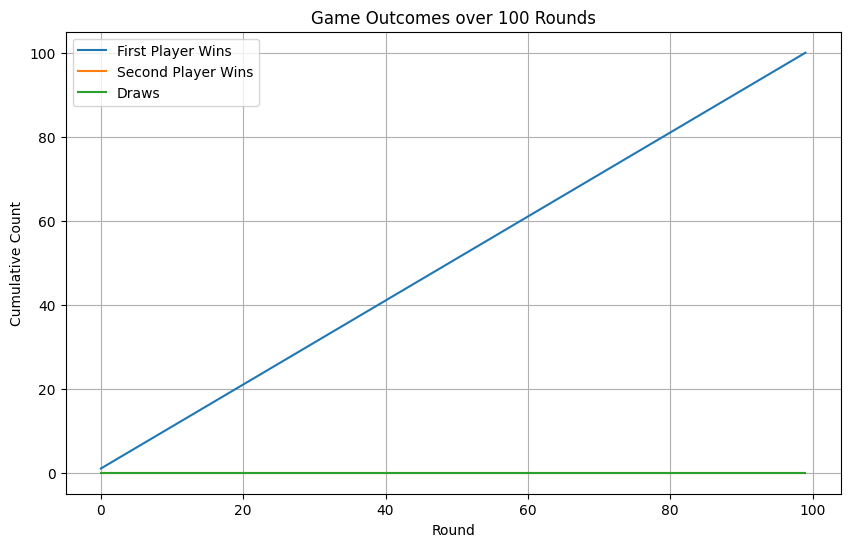

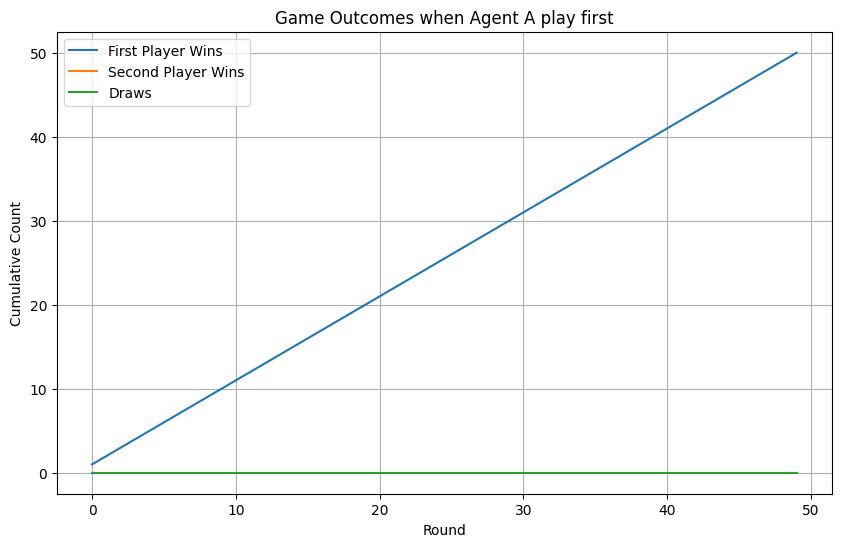

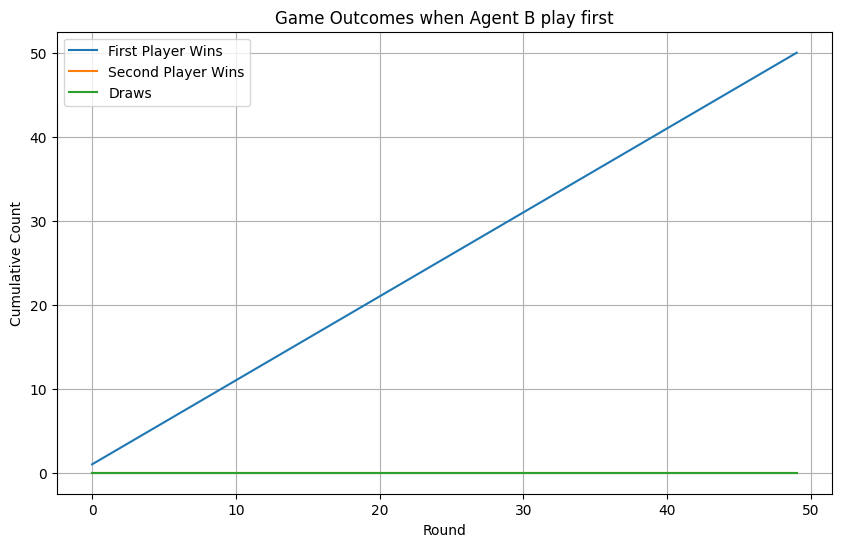

In [14]:
import matplotlib.pyplot as plt

# Unpacking the results
first_wins, second_wins, draws = zip(*for_plot)
fisrt_play_first_wins, fisrt_play_second_wins, fisrt_play_draws = zip(*for_plot_agent1_first)
second_play_first_wins, second_play_second_wins, second_play_draws = zip(*for_plot_agent2_first)

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(first_wins, label='First Player Wins')
plt.plot(second_wins, label='Second Player Wins')
plt.plot(draws, label='Draws')
plt.title(f'Game Outcomes over {rounds} Rounds')
plt.xlabel('Round')
plt.ylabel('Cumulative Count')
plt.legend()
plt.grid(True)
plt.show()

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(fisrt_play_first_wins, label='First Player Wins')
plt.plot(fisrt_play_second_wins, label='Second Player Wins')
plt.plot(fisrt_play_draws, label='Draws')
plt.title(f'Game Outcomes when Agent A play first')
plt.xlabel('Round')
plt.ylabel('Cumulative Count')
plt.legend()
plt.grid(True)
plt.show()

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(second_play_first_wins, label='First Player Wins')
plt.plot(second_play_second_wins, label='Second Player Wins')
plt.plot(second_play_draws, label='Draws')
plt.title(f'Game Outcomes when Agent B play first')
plt.xlabel('Round')
plt.ylabel('Cumulative Count')
plt.legend()
plt.grid(True)
plt.show()